# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from seaborn import pairplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd C:\Users\purvi\OneDrive\Documents\Delhi metro

C:\Users\purvi\OneDrive\Documents\Delhi metro


In [3]:
dm = pd.read_csv("Delhi metro.csv")

In [4]:
dm.head()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807


In [5]:
dm.tail()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
280,2,Shivaji Stadium,1.9,Orange line,23-02-2011,Underground,28.62901,77.21190
281,3,Dhaula Kuan [Conn: Pink],8.3,Orange line,15-08-2011,Elevated,28.59178,77.16155
282,4,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.54881,77.12092
283,5,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.55693,77.08669
284,6,Dwarka Sector 21 [Conn: Blue],20.8,Orange line,23-02-2011,Underground,28.55226,77.05828


In [6]:
dm.shape

(285, 8)

In [7]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID (Station ID)               285 non-null    int64  
 1   Station Names                 285 non-null    object 
 2   Dist. From First Station(km)  285 non-null    float64
 3   Metro Line                    285 non-null    object 
 4   Opened(Year)                  285 non-null    object 
 5   Layout                        285 non-null    object 
 6   Latitude                      285 non-null    float64
 7   Longitude                     285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [8]:
dm.describe()

,ID (Station ID),Dist. From First Station(km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,16.214035,19.218947,28.595428,77.029315
std,11.461808,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,6.000000,7.300000,28.545828,77.107130
50%,14.000000,17.400000,28.613453,77.207220
75%,24.000000,28.800000,28.666360,77.281165
max,49.000000,52.700000,28.878965,77.554479


In [9]:
# Check for missing values
dm.isnull().sum()

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

In [10]:
# print unique value in the "Metro line" column
print(dm['Metro Line'].unique())

['Red line' 'Yellow line' 'Blue line' 'Blue line branch'
 'Green line branch' 'Green line' 'Rapid Metro' 'Voilet line'
 'Magenta line' 'Pink line' 'Aqua line' 'Gray line' 'Orange line']


In [11]:
dm.groupby('Metro Line').count()

,ID (Station ID),Station Names,Dist. From First Station(km),Opened(Year),Layout,Latitude,Longitude
Metro Line,,,,,,,
Aqua line,21,21,21,21,21,21,21
Blue line,49,49,49,49,49,49,49
Blue line branch,8,8,8,8,8,8,8
Gray line,3,3,3,3,3,3,3
Green line,21,21,21,21,21,21,21
Green line branch,3,3,3,3,3,3,3
Magenta line,25,25,25,25,25,25,25
Orange line,6,6,6,6,6,6,6
Pink line,38,38,38,38,38,38,38


## Pie plot for Metro Line:

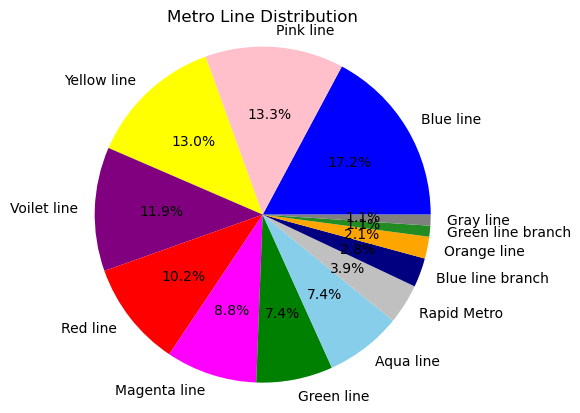

In [28]:
# Create a dictionary to map Metro Line names to colors
line_colors = {
    'Red line': 'red',
    'Yellow line': 'yellow',
    'Blue line': 'blue',
    'Blue line branch': 'navy',
    'Green line branch': 'forestgreen',
    'Green line': 'green',
    'Rapid Metro': 'silver',
    'Voilet line': 'purple',  
    'Magenta line': 'magenta',
    'Pink line': 'pink',
    'Aqua line': 'skyblue',
    'Gray line': 'gray',
    'Orange line': 'orange'
    # Add more lines and colors as needed
}

# Calculate value counts for each Metro Line
line_counts = dm['Metro Line'].value_counts()

# Create a pie chart using custom colors
plt.pie(line_counts, labels=line_counts.index, autopct='%1.1f%%', colors=[line_colors[line] for line in line_counts.index])

# Set aspect ratio to be equal, so the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Metro Line Distribution')

# Display the pie chart
plt.show()

### A pie chart to visualize the distribution of metro stations across different metro lines, using custom colors defined in the line_colors dictionary. The chart provides a clear representation of the proportion of stations for each metro line, making it easy to identify the most prominent lines and their relative significance within the metro network.

## Creating an interactive Map of Delhi Metro Stations

In [13]:
!pip install folium

In [14]:
import folium

In [20]:
# Create a base map centered on Delhi
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=12)

# Add markers for each metro station
for index, row in dm.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station Names']).add_to(delhi_map)

# Display the map
display(delhi_map)

### The code generates a base map centered on Delhi and adds markers for each metro station based on their latitude and longitude coordinates. This visual representation helps in spatially understanding the distribution of metro stations across Delhi, aiding in navigation and geographical analysis of the metro network's coverage in the region.

## Bar Plot of Station counts by Metro Line

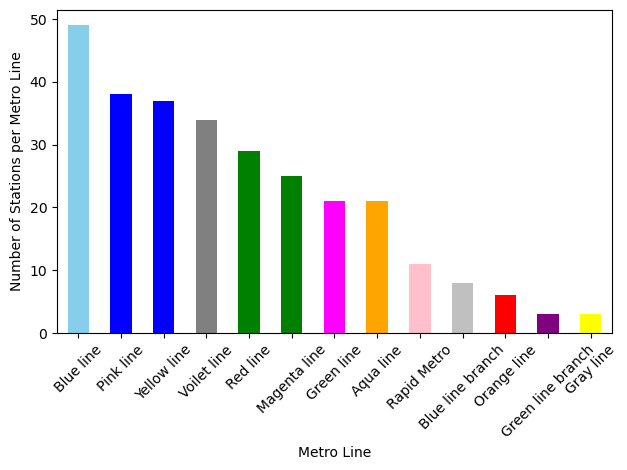

In [26]:
dm['Metro Line'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations per Metro Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The bar plot visualizes the station count for each metro line, with colors distinguishing between lines. It helps easily compare station counts across lines, spot trends in station distribution, and identify any notable disparities or concentrations among metro lines at a glance.

## Histogram of Distance from First Station:

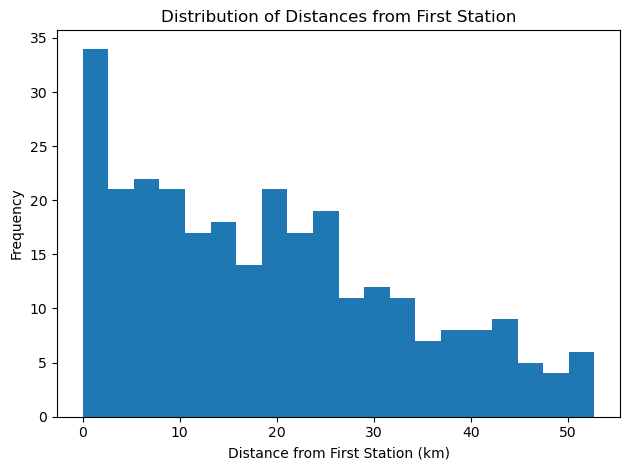

In [17]:
plt.hist(dm['Dist. From First Station(km)'], bins=20)
plt.xlabel('Distance from First Station (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances from First Station')
plt.tight_layout()
plt.show()

## Line plot of Yearly Openings:

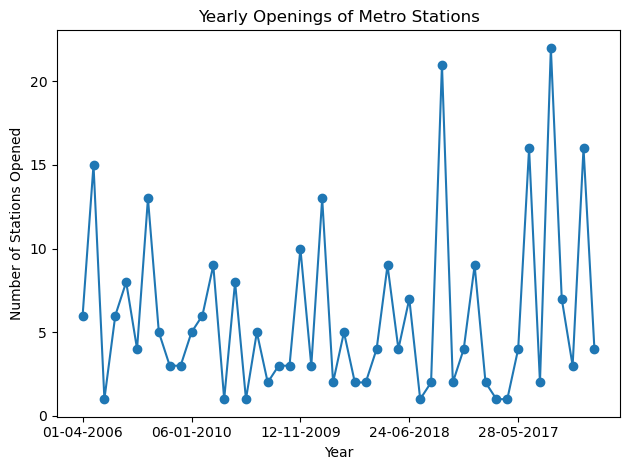

In [27]:
yearly_openings = dm.groupby('Opened(Year)').size()
yearly_openings.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')
plt.title('Yearly Openings of Metro Stations')
plt.tight_layout()
plt.show()

### The line plot depicts the yearly openings of metro stations, showcasing trends over time. It highlights periods of high or low station openings, aiding in understanding growth patterns and potential development phases in metro infrastructure. The marker points emphasize specific years with notable station openings, offering a clear visual representation for analysis and decision-making.

## Bar Plot of Layout by Metro Line:

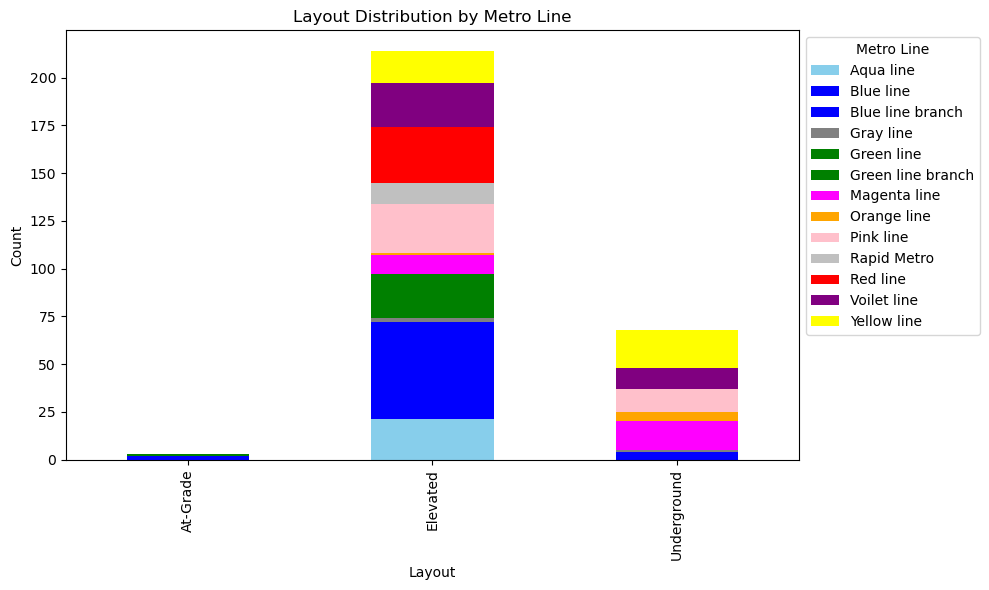

In [19]:
# Create a cross-tabulation of Layouts and Metro Lines
layout_by_line = pd.crosstab(dm['Layout'], dm['Metro Line'])

# Define line colors according to the pattern
line_colors = {
    'Red line': 'red',
    'Yellow line': 'yellow',
    'Blue line': 'blue',
    'Blue line branch': 'blue',
    'Green line branch': 'green',
    'Green line': 'green',
    'Rapid Metro': 'silver',
    'Voilet line': 'purple',  
    'Magenta line': 'magenta',
    'Pink line': 'pink',
    'Aqua line': 'skyblue',
    'Gray line': 'gray',
    'Orange line': 'orange'
}

# Create a list of colors corresponding to each line
colors = [line_colors[line] for line in layout_by_line.columns]

# Plot a stacked bar plot with specified colors
layout_by_line.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Layout')
plt.ylabel('Count')
plt.title('Layout Distribution by Metro Line')
plt.legend(title='Metro Line', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### insights : Its a stacked bar plot showing the distribution of station layouts across metro lines. Each bar segment represents a metro line, color-coded for easy identification, providing insights into layout variations and their prevalence across different lines.